In [268]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[FAIL] xgboost version 2.1.1 is required, but 2.1.2 installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


In [269]:
import pandas as pd
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("marius2303/ad-click-prediction-dataset")

csv_file_path = os.path.join(path, 'ad_click_dataset.csv') 
df = pd.read_csv(csv_file_path)


df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [270]:
#EDA 
print(df.shape[0], "rows and", df.shape[1], "columns")

10000 rows and 9 columns


In [271]:
# Number of Missing Values to Filled Values Per Column 
missing_dict = {}

for col in df.columns:
   missing_dict[col] = df[col].isna().sum() * 100 / len(df[col])

for feature, percentage in missing_dict.items():
    print(feature, 'is', percentage, '% missing values')



id is 0.0 % missing values
full_name is 0.0 % missing values
age is 47.66 % missing values
gender is 46.93 % missing values
device_type is 20.0 % missing values
ad_position is 20.0 % missing values
browsing_history is 47.82 % missing values
time_of_day is 20.0 % missing values
click is 0.0 % missing values


In [272]:
#remove rows where all of the columns have are NAN except (ID AND FULL NAME) 
na_columns = ['age', 'gender', 'browsing_history', 'device_type', 'ad_position', 'time_of_day']
mask = df[na_columns].isna().all(axis=1)
print("Before filtering:", df.shape)
df_filtered = df[~mask]
print("After filtering:", df_filtered.shape)

Before filtering: (10000, 9)
After filtering: (9993, 9)


In [339]:
#number of unique users
df["id"].nunique()

4000

In [340]:
print("Describe: Age", "\n", df["age"].describe())

Describe: Age 
 count    5234.000000
mean       40.197363
std        13.126420
min        18.000000
25%        29.000000
50%        39.500000
75%        52.000000
max        64.000000
Name: age, dtype: float64


In [275]:
clicked_df = df[df["click"]==1].fillna('Missing')
nonclicked_df = df[df["click"]==0].fillna('Missing')

print("Clicked Count =", len(clicked_df), "  Non Clicked Count =", len(nonclicked_df)  )

Clicked Count = 6500   Non Clicked Count = 3500


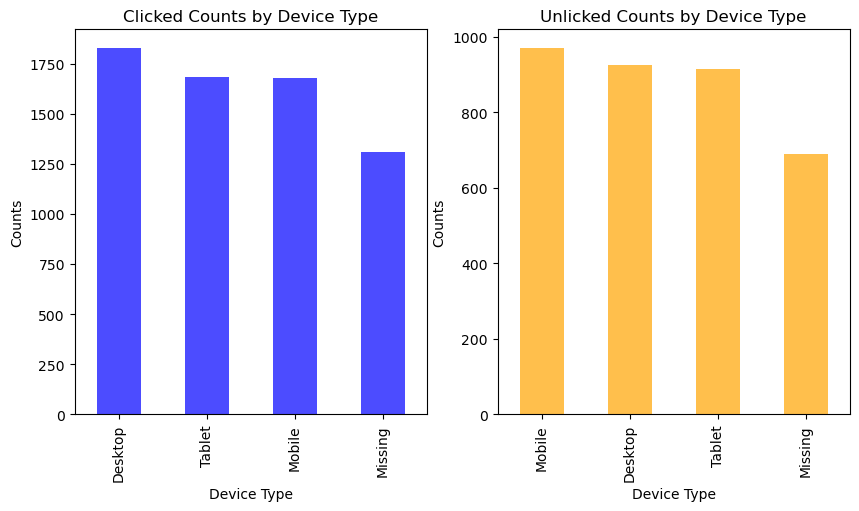

In [950]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

dev_clicked_counts = clicked_df['device_type'].value_counts()
dev_nonclicked_counts = nonclicked_df['device_type'].value_counts()

plt.subplot(1, 2, 1)
dev_clicked_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Clicked Counts by Device Type")
plt.xlabel("Device Type") 
plt.ylabel("Counts") 


plt.subplot(1, 2, 2)
dev_nonclicked_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Unlicked Counts by Device Type")
plt.xlabel("Device Type") 
plt.ylabel("Counts") 

plt.savefig("Device_type_Frequencies_by_Target_Var.png", dpi=300)
plt.show()

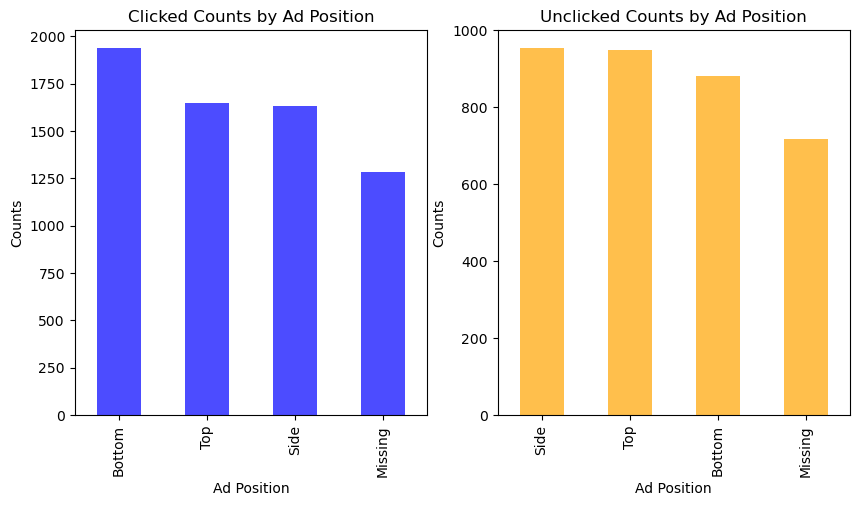

In [951]:
plt.figure(figsize=(10,5))

pos_clicked_counts = clicked_df['ad_position'].value_counts()
pos_nonclicked_counts = nonclicked_df['ad_position'].value_counts()

plt.subplot(1, 2, 1)
pos_clicked_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Clicked Counts by Ad Position")
plt.xlabel("Ad Position") 
plt.ylabel("Counts") 


plt.subplot(1, 2, 2)
pos_nonclicked_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Unclicked Counts by Ad Position")
plt.xlabel("Ad Position") 
plt.ylabel("Counts") 

plt.savefig("Ad_Position_Frequencies_by_Target_Var.png", dpi=300)
plt.show()

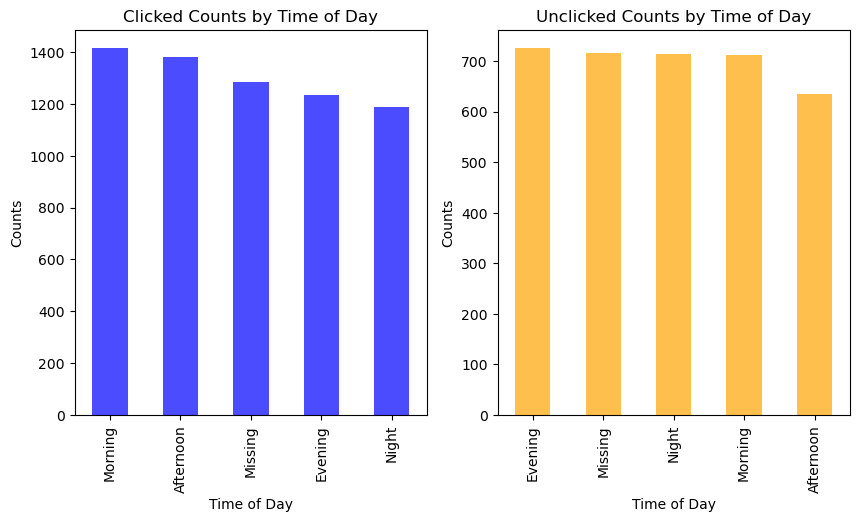

In [952]:
plt.figure(figsize=(10,5))

time_clicked_counts = clicked_df['time_of_day'].value_counts()
time_nonclicked_counts = nonclicked_df['time_of_day'].value_counts()

plt.subplot(1, 2, 1)
time_clicked_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Clicked Counts by Time of Day") 
plt.xlabel("Time of Day")  
plt.ylabel("Counts") 

plt.subplot(1, 2, 2)
time_nonclicked_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Unclicked Counts by Time of Day")
plt.xlabel("Time of Day") 
plt.ylabel("Counts") 


plt.savefig("Time_of_Day_Frequencies_by_Target_Var.png", dpi=300)
plt.show()

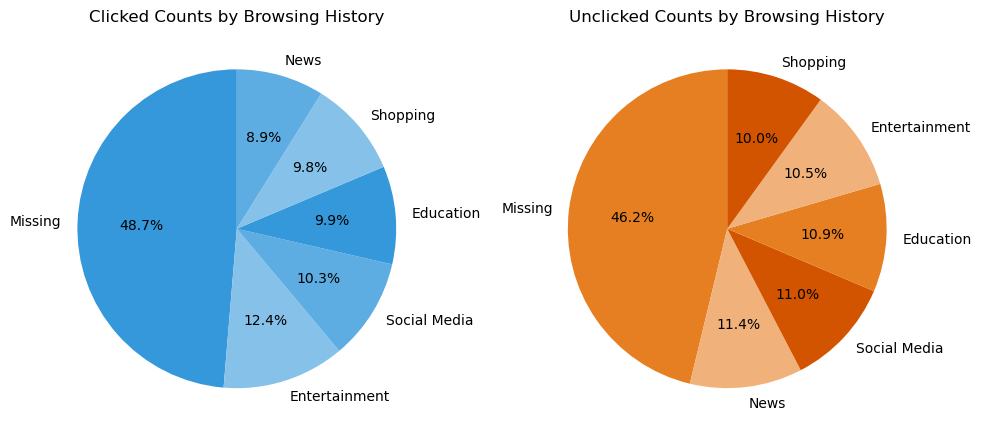

In [953]:
# plt.figure(figsize=(10,5))

brow_clicked_counts = clicked_df['browsing_history'].value_counts()
brow_nonclicked_counts = nonclicked_df['browsing_history'].value_counts()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
brow_clicked_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#3498db', '#85c1e9', '#5dade2'], startangle=90)
plt.title("Clicked Counts by Browsing History")
plt.ylabel('') 

plt.subplot(1, 2, 2)
brow_nonclicked_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#e67e22', '#f0b27a', '#d35400'], startangle=90)
plt.title("Unclicked Counts by Browsing History")
plt.ylabel('') 

plt.savefig("Browsing_History_Percentages_by_Target_Var.png", dpi=300)
plt.tight_layout()
plt.show()

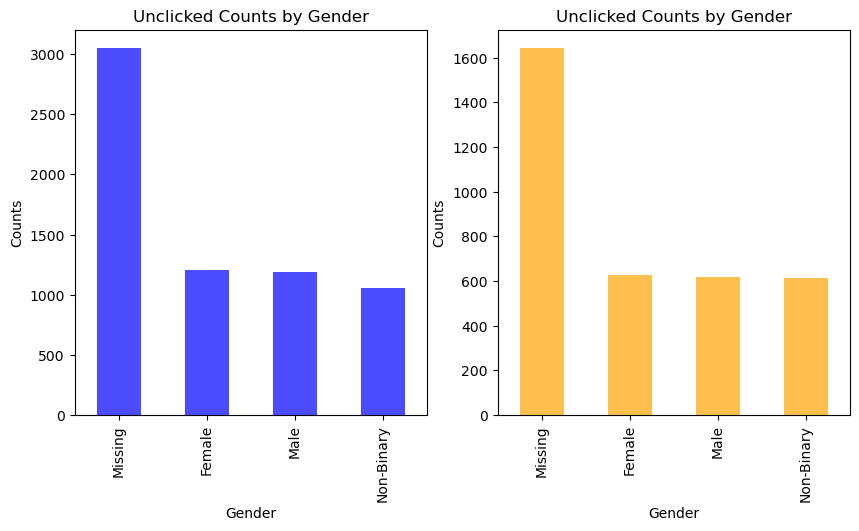

In [954]:
plt.figure(figsize=(10,5))

gen_clicked_counts = clicked_df['gender'].value_counts()
gen_nonclicked_counts = nonclicked_df['gender'].value_counts()

plt.subplot(1, 2, 1)
gen_clicked_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Unclicked Counts by Gender")
plt.xlabel("Gender") 
plt.ylabel("Counts") 

plt.subplot(1, 2, 2)
gen_nonclicked_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Unclicked Counts by Gender")
plt.xlabel("Gender") 
plt.ylabel("Counts") 

plt.savefig("Gender_Frequencies_by_Target_Var.png", dpi=300)
plt.show()

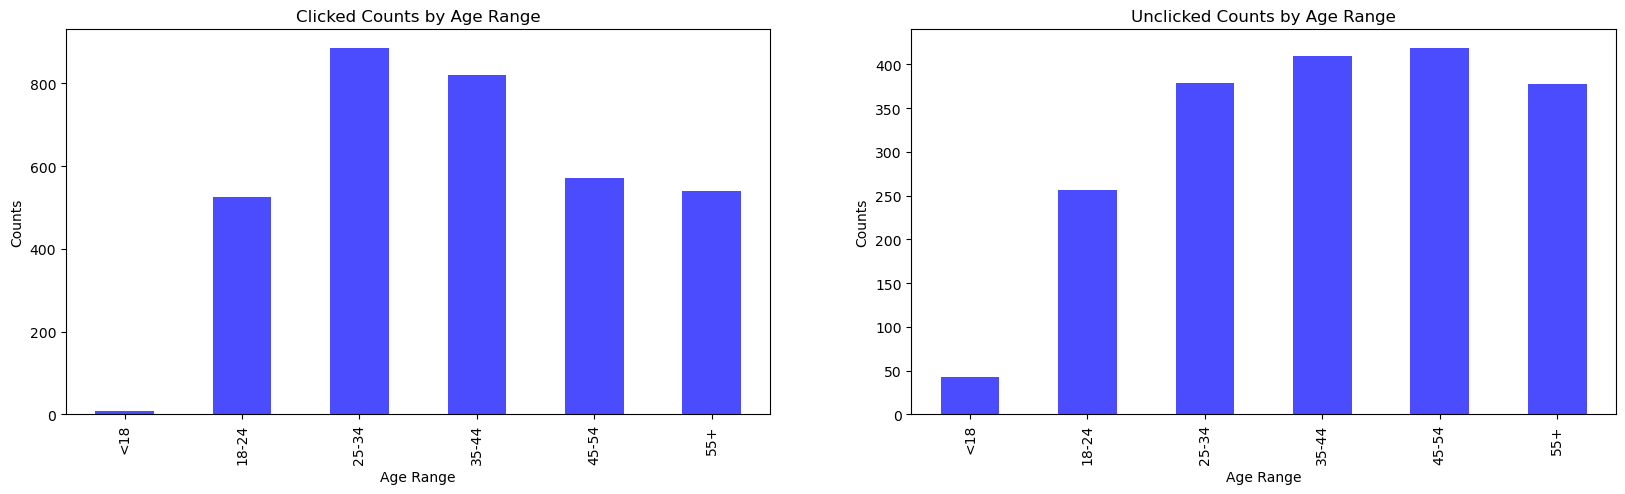

In [955]:
bins = [0, 18, 25, 35, 45, 55, 65] 
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55+']

plt.figure(figsize=(20,5))

age_clicked = pd.cut(clicked_df[clicked_df['age'] != 'Missing']['age'], bins=bins, labels=labels, include_lowest=True)
age_nonclicked = pd.cut(nonclicked_df[nonclicked_df['age'] != 'Missing']['age'], bins=bins, labels=labels, include_lowest=True)

plt.subplot(1, 2, 1)
age_clicked.value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7)
plt.title("Clicked Counts by Age Range")
plt.xlabel("Age Range") 
plt.ylabel("Counts") 


plt.subplot(1, 2, 2)
age_nonclicked.value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7)
plt.title("Unclicked Counts by Age Range")
plt.xlabel("Age Range") 
plt.ylabel("Counts") 

plt.savefig("Age_Ranges_by_Target_Var.png", dpi=300)
plt.show()

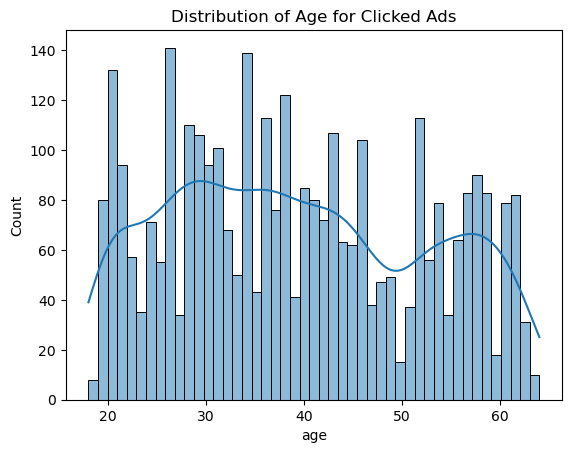

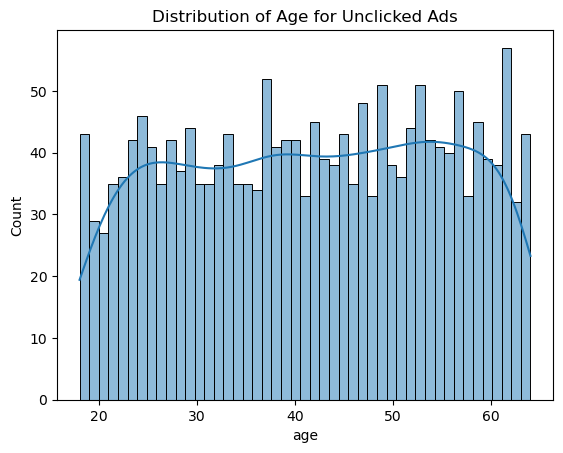

In [956]:
clicked = clicked_df[clicked_df['age'] != 'Missing']['age']
unclicked = nonclicked_df[nonclicked_df['age'] != 'Missing']['age']

sns.histplot(clicked, bins=clicked.nunique(), kde=True)
plt.title('Distribution of Age for Clicked Ads')

plt.savefig("Distribution of Age for Clicked Ads.png", dpi=300)
plt.show()


sns.histplot(unclicked, bins=unclicked.nunique(), kde=True)
plt.title('Distribution of Age for Unclicked Ads')

plt.savefig("Distribution of Age for Unclicked Ads.png", dpi=300)
plt.show()

In [904]:
#Preprocessing 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split


onehot_ftrs = ['gender', 'device_type', 'ad_position', 'browsing_history']
stan_ftrs = ['age']
ordinal_ftrs = ['time_of_day']
time_of_day_order = ["Unknown", "Morning", "Afternoon", "Evening", "Night" ]


onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

ordinal_pipeline = Pipeline([
    ('ordinal', OrdinalEncoder(categories=[time_of_day_order])),
    ('scaling', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot_scaled', onehot_pipeline, onehot_ftrs),  
        ('ordinal_scaled', ordinal_pipeline, ordinal_ftrs), 
        ('scaler', StandardScaler(), stan_ftrs)
    ]
)


In [905]:

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

def xgboost_feature_imputation(X, feature):
    """
    Impute missing values for a given numeric feature using XGBoost.
    Args:
        X: DataFrame containing the dataset.
        feature: The name of the feature to impute.
        is_categorical: Whether the feature is categorical or numerical.
    Returns:
        X: DataFrame with the missing values imputed for the specified feature.
    """
            
    #data into sets where feature is missing and not missing 
    train_data = X[X[feature].notna()]
    test_data = X[X[feature].isna()]
    
    X_train = train_data.drop(columns=[feature])
    y_train = train_data[feature]
    X_test = test_data.drop(columns=[feature])
    
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_test = pd.get_dummies(X_test, drop_first=True)

    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, enable_categorical=True)
    
    #train model and predict missing values
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    #fill in datset with predicted values 
    X.loc[X[feature].isna(), feature] = predictions
    
    return X

In [906]:
from sklearn.inspection import permutation_importance

def feature_importance_calculator(grid, feature_names, X_test, y_test, random_state, ML_algo):
    
    importances_df = pd.DataFrame({"Feature": feature_names})

    #perturbation importance calculations
    perm_importance = permutation_importance(
        grid.best_estimator_[1], 
        X_test, 
        y_test, 
        scoring='f1',
        random_state=random_state
    )

    importances_df[f"{ML_algo} Perturbation Importance"] = perm_importance.importances_mean


    if hasattr(grid.best_estimator_[1], 'coef_'):  
        coefficients = grid.best_estimator_[1].coef_.flatten()

        importances_df[f"{ML_algo} Feature Importance"] = coefficients


    if hasattr(grid.best_estimator_[1], 'feature_importances_'):  
        tree_importances = grid.best_estimator_[1].feature_importances_

        importances_df[f"{ML_algo} Feature Importance"] = tree_importances

    #sorting by first metric
    first_metric = importances_df.columns[1]
    importances_df = importances_df.sort_values(by=first_metric, ascending=False)

    return importances_df


def shap_feature_importance_calc(ML_algo, X_test, grid, feature_names):

    model_type = type(ML_algo).__name__

    #find and use appropriate explainer for the model 
    if model_type in ["KNeighborsClassifier"]:
        background = shap.kmeans(X_test, 10)
        explainer = shap.KernelExplainer(grid.best_estimator_[1].predict_proba, background)
        
    elif model_type in ["LogisticRegression"]:
        explainer = shap.LinearExplainer(grid.best_estimator_[1], X_test)
        
    elif model_type in ["DecisionTreeClassifier"]:
        explainer = shap.TreeExplainer(grid.best_estimator_[1])
        
    elif model_type in ["RandomForestClassifier"]:
        explainer = shap.TreeExplainer(grid.best_estimator_[1])

    elif model_type in ["XGBClassifier"]:
        explainer = shap.TreeExplainer(grid.best_estimator_[1])
        
    else:
        raise ValueError(f"Unsupported model type: {model_type}.")

    #compute SHAP values
    shap_values = explainer(X_test)

    if len(shap_values.values.shape) == 3: #for multi output models 
            shap_importances = shap_values.values.mean(axis=0).mean(axis=1)
    else: #for single output models  
            shap_importances = shap_values.values.mean(axis=0) 

    shap_importances = pd.DataFrame({
            "Feature": feature_names,
            f"{ML_algo} SHAP Values": shap_importances
        })

    return shap_values, shap_importances.set_index("Feature"), explainer

def local_shap_feature_importance_plotter(explainer, X_test, feature_names, ML_algo, shap_vals):
    indices = [0,100,200]
    model = type(ML_algo).__name__
    shap_plots = {}
    shap_plots[model] = {}
    
    shap_values = shap_vals.values  

    #loop through indices for local shaps
    for index in indices:
        if shap_values.ndim == 2: #single output model
            force_plot = shap.force_plot(
                explainer.expected_value,
                shap_values[index], 
                features=X_test[index],  
                feature_names=feature_names
            )
        elif shap_values.ndim == 3:  #multi-output model          
            force_plot = shap.force_plot(
                explainer.expected_value[0], 
                shap_values[index, :, 0],  
                features=X_test[index],  
                feature_names=feature_names
            )
        
        shap_plots[index] = force_plot  

    return shap_plots

In [907]:
from sklearn.model_selection import StratifiedGroupKFold, train_test_split
import numpy as np

X = df_filtered.drop(["click", "full_name"], axis=1)
y = df_filtered["click"]
ids = df_filtered["id"]

unknown_columns = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
categorical_columns = ['gender', 'device_type', 'ad_position', 'browsing_history']

X[unknown_columns] = X[unknown_columns].fillna("Unknown")

for col in unknown_columns:
    if col in X.columns:
        X[col] = X[col].astype('category')


In [937]:
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import numpy as np
import shap

def MLpipeline(X, y, preprocessor, ML_algo, param_grid):
    test_scores = []
    best_models = []
    models = []
    all_importances = []
    accuracies = []
    baseline_accuracies = []
    baseline_f1scores = []
    model_metrics = {}
    confusion_matrix = {}
    model_type = type(ML_algo).__name__

    for r in range(1, 5):  # Perform 4 runs with different random states
        ids = X["id"]
        
        # Split the data into training+validation and test sets (80-20 split)
        X_other, X_test, y_other, y_test, ids_train_val, ids_test = train_test_split(
            X, y, ids, test_size=0.2, stratify=y, random_state=r * 42)

        if model_type not in ["XGBClassifier"]: 
            X_other = xgboost_feature_imputation(X_other, feature='age')
            X_test = xgboost_feature_imputation(X_test, feature='age')

     
        X_test = X_test.drop(columns=["id"])

        print("Random State:", r)

        X_train, X_val, y_train, y_val = train_test_split(
            X_other, y_other, test_size=0.2, stratify=y_other, random_state=r * 42
        )

        #drop the `id` column from training and validation sets
        ids = X_train["id"]
        X_train = X_train.drop(columns=["id"])
        X_val = X_val.drop(columns=["id"])

        #stratifiedGroupKFold for cross-validation
        kf = StratifiedGroupKFold(n_splits=4, shuffle=True, random_state=r * 42)

        # Create a pipeline with the preprocessor and ML algorithm
        pipe = make_pipeline(preprocessor, ML_algo)

        preprocessor.fit(X_train) 
        X_val = preprocessor.transform(X_val)

        # Define fit parameters for early stopping (specific to XGBClassifier)
        fit_params = {}
        if model_type == "XGBClassifier":
            fit_params = {
                'xgbclassifier__eval_set': [(X_val, y_val)],  
                'xgbclassifier__verbose': False, 
            }

        # GridSearchCV with cross-validation
        grid = GridSearchCV(
            pipe,
            param_grid=param_grid,
            scoring='f1',
            cv=kf.split(X_train, y_train, groups=ids), 
            return_train_score=True,
            n_jobs=-1,
            verbose=True
        )

        # Fit the pipeline using GridSearchCV
        grid.fit(X_train, y_train, **fit_params)

        #calculate test scores
        models.append(grid)
        best_models.append(grid.best_params_)
        y_test_pred = models[-1].predict(X_test)

        print("Predicted Positive Proportion:", sum(y_test_pred == 1) / len(y_test_pred))
        test_scores.append(f1_score(y_test, y_test_pred))

        #calculate accuracy, baseline accuracy, and baseline F1 score
        accuracy = accuracy_score(y_test, y_test_pred)
        baseline_pred = [1 if sum(y_test) / len(y_test) >= 0.5 else 0] * len(y_test)
        baseline_accuracy = accuracy_score(y_test, baseline_pred)
        baseline_f1score = f1_score(y_test, baseline_pred)

        accuracies.append(accuracy)
        baseline_accuracies.append(baseline_accuracy)
        baseline_f1scores.append(baseline_f1score)

        #preprocess the data to verify the pipeline works
        X_transformed = pipe.named_steps['columntransformer'].fit_transform(X_other)
        X_transformed_test = pipe.named_steps['columntransformer'].transform(X_test)

        feature_names = grid.best_estimator_.named_steps['columntransformer'].get_feature_names_out()

        # Calculate feature importances
        importances_df = feature_importance_calculator(
            grid, 
            feature_names, 
            X_transformed_test, 
            y_test, 
            r * 42, 
            ML_algo
        )

        all_importances.append(importances_df)

        print("Preprocessed Train Shape:", X_transformed.shape)
        print("Preprocessed Test Shape:", X_transformed_test.shape)
        print('Best Model Parameters:', grid.best_params_)
        print('Validation Score:', grid.best_score_, "\n")

    print("Test Scores of", ML_algo, test_scores)
    print("Mean of Test Scores of", ML_algo, np.mean(test_scores))
    print("STDEV of Test Scores of", ML_algo, np.std(test_scores), "\n")


    model_metrics = {
        'accuracies': accuracies,
        'mean_accuracy': np.mean(accuracies),
        'std_accuracy': np.std(accuracies),
        'baseline_accuracies': baseline_accuracies,
        'mean_baseline_accuracy': np.mean(baseline_accuracies),
        'mean_f1scores': np.mean(test_scores),
        'std_f1scores': np.std(test_scores),
        'mean_baseline_f1score': np.mean(baseline_f1scores)
    }

    #confusion matrix
    confusion_matrix["true"] = y_test
    confusion_matrix["pred"] = y_test_pred

    #combine feature importances and calculate mean
    combined_importances = pd.concat(all_importances)
    average_importances = combined_importances.groupby("Feature").mean()

    #SHAP values
    shap_values, shap_importances, shap_explainer = shap_feature_importance_calc(ML_algo, X_transformed_test, grid, feature_names)
    average_importances = average_importances.merge(
        shap_importances,
        how="left",
        left_index=True,
        right_index=True
    )

    # Local SHAP plots
    shap_plots = local_shap_feature_importance_plotter(shap_explainer, X_transformed_test, feature_names, ML_algo, shap_values)

    return test_scores, best_models, average_importances, shap_plots, model_metrics, confusion_matrix

In [938]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.linear_model import Lasso, Ridge, ElasticNet

param_model_dict = {
    'LogReg': {
        'model': LogisticRegression(max_iter=3000, random_state=42, penalty="l2"),
        'params': {
            'logisticregression__C': np.logspace(-3, 5, 9)
        }
    },
    'XGB' : {
    'model': XGBClassifier(random_state=42, eval_metric='logloss', early_stopping_rounds = 20, enable_categorical=True ),
    'params': {
        'xgbclassifier__n_estimators': [50, 100, 200, 250], 
        'xgbclassifier__max_depth': [3, 5, 7], 
        'xgbclassifier__gamma': [0, 0.1, 0.3]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'kneighborsclassifier__n_neighbors': [1, 3, 5, 10],
            'kneighborsclassifier__weights': ['uniform', 'distance']
        }
    },
    'DT': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'decisiontreeclassifier__max_depth': [1, 3, 5, 10, None],
            'decisiontreeclassifier__min_samples_split': [2, 5, 10],
            'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
        }
    },
    'RF': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'randomforestclassifier__max_depth': [1, 3, 5, 10],
            'randomforestclassifier__max_features': [0.5, 0.75, 1.0]
        }
    }
}

model_keys = ["XGB", "LogReg", "DT", "RF", "KNN"]

importances_dict = {}

best_performer = {}

shap_plots_dict = {}

scores = {}

conf_matrices = {}

for model in model_keys: 
    algo = param_model_dict[model]['model']
    params = param_model_dict[model]['params']
    tests, models, importances, shap_plots, metrics, conf_matrix = MLpipeline(X, y, preprocessor, algo, params)
    best_performer[model] = {'mean': np.mean(tests), 'std': np.std(tests)}
    importances_dict[model] = importances 
    shap_plots_dict[model] = shap_plots
    scores[model] = metrics
    conf_matrices[model] = conf_matrix
    

Random State: 1
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Predicted Positive Proportion: 0.9409704852426213
Preprocessed Train Shape: (7994, 20)
Preprocessed Test Shape: (1999, 20)
Best Model Parameters: {'xgbclassifier__gamma': 0.3, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 50}
Validation Score: 0.7575442154639587 

Random State: 2
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Predicted Positive Proportion: 0.9309654827413707
Preprocessed Train Shape: (7994, 20)
Preprocessed Test Shape: (1999, 20)
Best Model Parameters: {'xgbclassifier__gamma': 0.3, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 50}
Validation Score: 0.7616709142468147 

Random State: 3
Fitting 4 folds for each of 36 candidates, totalling 144 fits
Predicted Positive Proportion: 0.9279639819909955
Preprocessed Train Shape: (7994, 20)
Preprocessed Test Shape: (1999, 20)
Best Model Parameters: {'xgbclassifier__gamma': 0.1, 'xgbclassifier__max_depth': 

  0%|          | 0/1999 [00:00<?, ?it/s]

In [939]:
print("logreg", scores["LogReg"])
print("DT", scores["DT"])
print("RF", scores["RF"])
print("KNN", scores["KNN"])
print("XGB", scores["XGB"])

logreg {'accuracies': [0.6498249124562281, 0.6498249124562281, 0.6498249124562281, 0.6498249124562281], 'mean_accuracy': 0.6498249124562281, 'std_accuracy': 0.0, 'baseline_accuracies': [0.6498249124562281, 0.6498249124562281, 0.6498249124562281, 0.6498249124562281], 'mean_baseline_accuracy': 0.6498249124562281, 'mean_f1scores': 0.7877501516070345, 'std_f1scores': 0.0, 'mean_baseline_f1score': 0.7877501516070345}
DT {'accuracies': [0.6503251625812907, 0.6588294147073537, 0.6513256628314157, 0.6538269134567284], 'mean_accuracy': 0.6535767883941971, 'std_accuracy': 0.003289881550266602, 'baseline_accuracies': [0.6498249124562281, 0.6498249124562281, 0.6498249124562281, 0.6498249124562281], 'mean_baseline_accuracy': 0.6498249124562281, 'mean_f1scores': 0.7893243445985112, 'std_f1scores': 0.0016445086794631572, 'mean_baseline_f1score': 0.7877501516070345}
RF {'accuracies': [0.655327663831916, 0.662831415707854, 0.6513256628314157, 0.6538269134567284], 'mean_accuracy': 0.6558279139569785, 's

In [ ]:
shap_plots_dict["KNN"][0]

In [945]:
importances_dict["LogReg"]

,"LogisticRegression(max_iter=3000, random_state=42) Perturbation Importance","LogisticRegression(max_iter=3000, random_state=42) Feature Importance","LogisticRegression(max_iter=3000, random_state=42) SHAP Values"
Feature,,,
onehot_scaled__ad_position_Bottom,0.0,0.047762,-0.000139
onehot_scaled__ad_position_Side,0.0,-0.018985,0.001084
onehot_scaled__ad_position_Top,0.0,-0.018402,-0.001160
onehot_scaled__ad_position_Unknown,0.0,-0.010344,0.000016
onehot_scaled__browsing_history_Education,0.0,-0.012559,-0.000151
onehot_scaled__browsing_history_Entertainment,0.0,0.018772,0.000691
onehot_scaled__browsing_history_News,0.0,-0.023554,0.000421
onehot_scaled__browsing_history_Shopping,0.0,0.005660,0.000012
onehot_scaled__browsing_history_Social Media,0.0,-0.009763,-0.000005


XGB


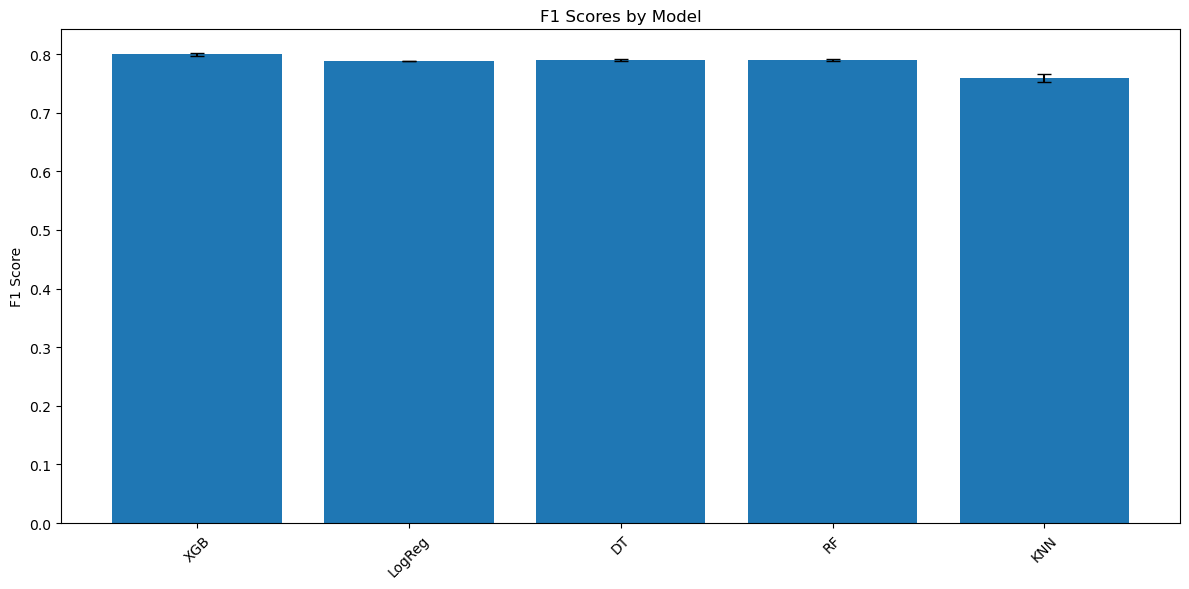

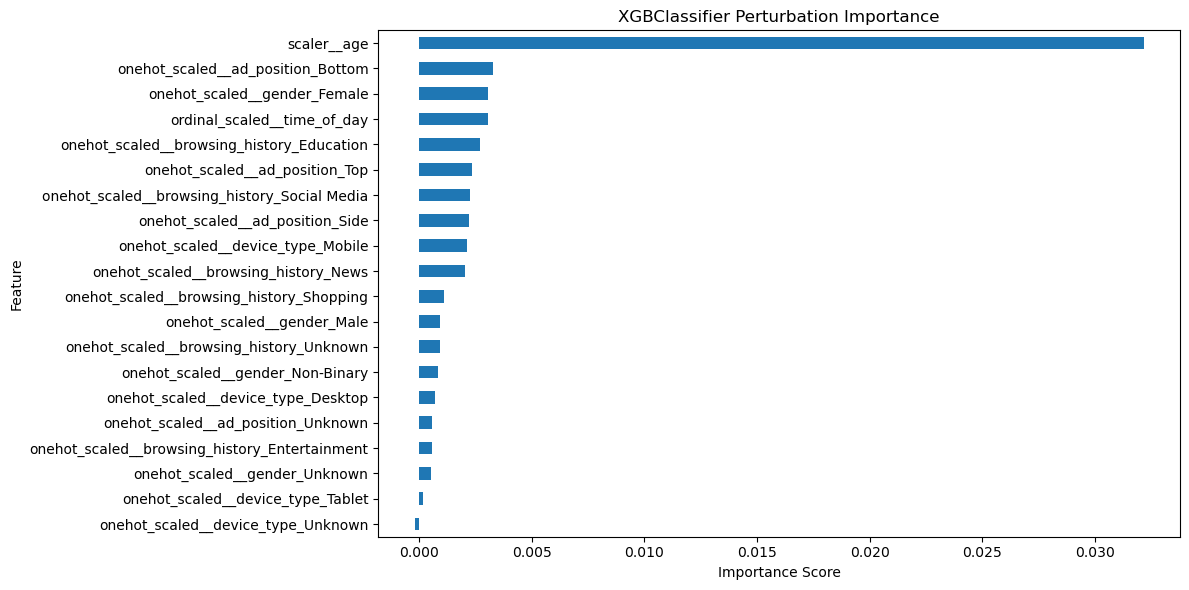

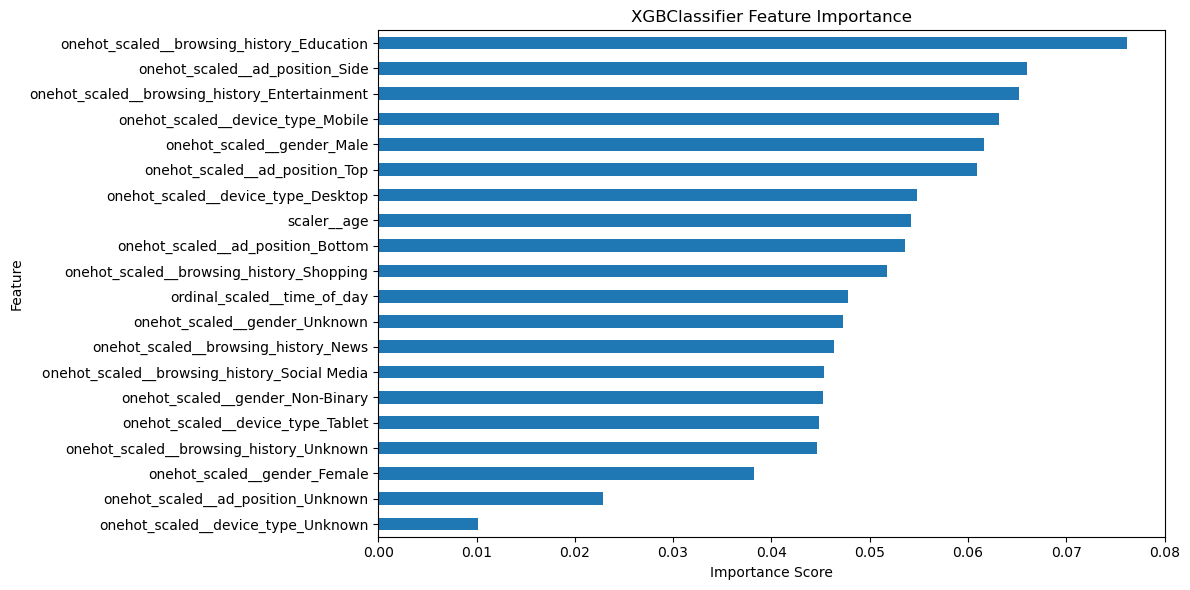

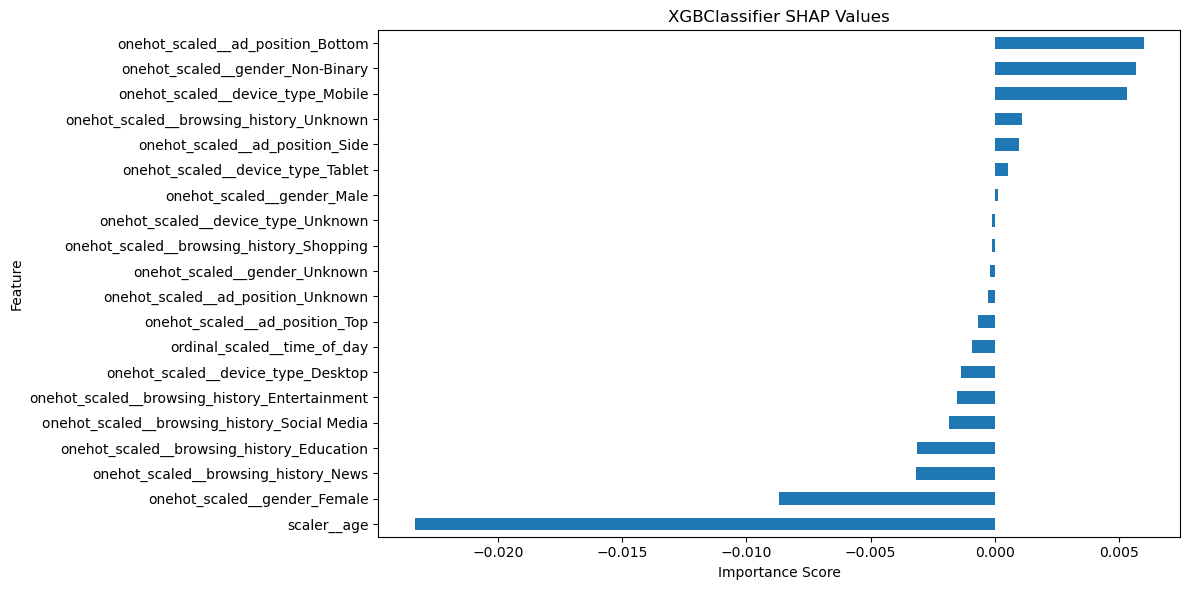

LogReg


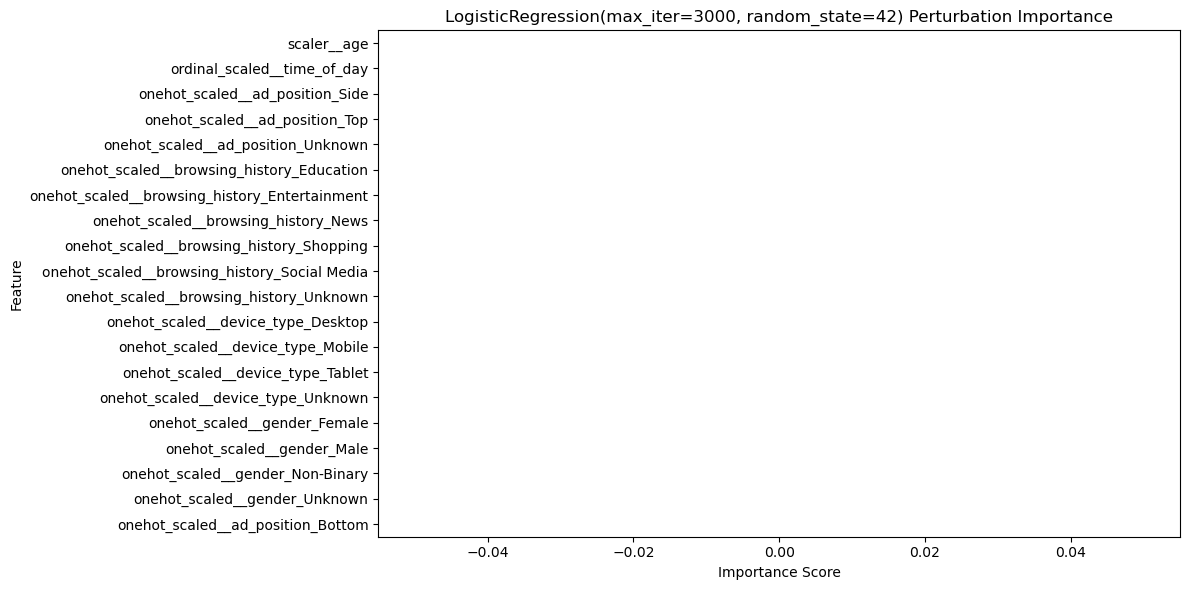

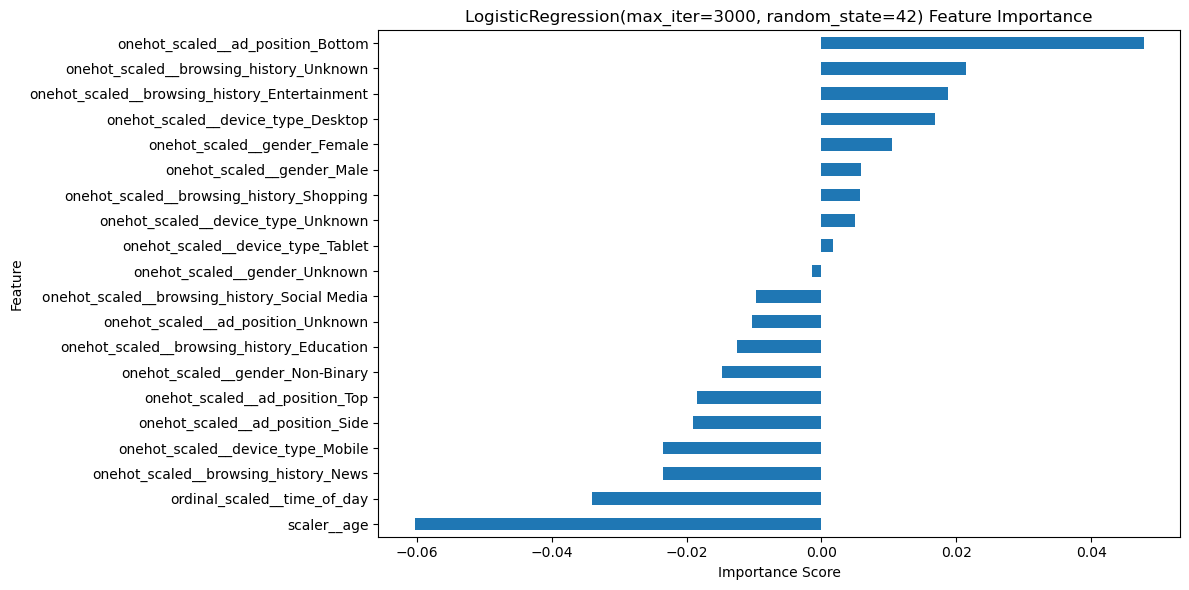

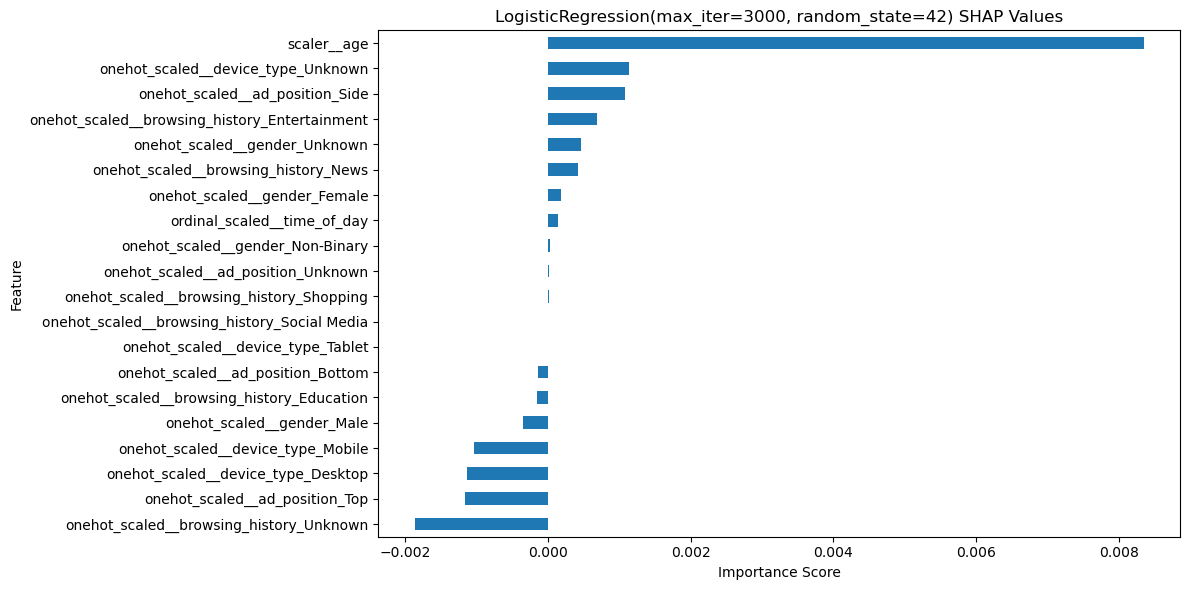

DT


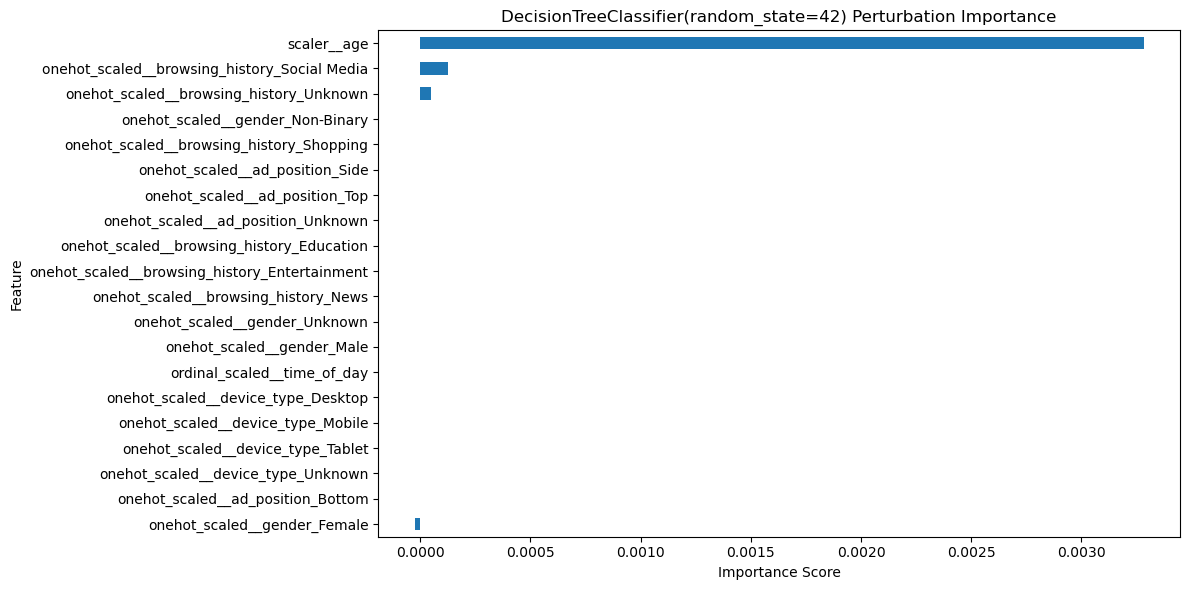

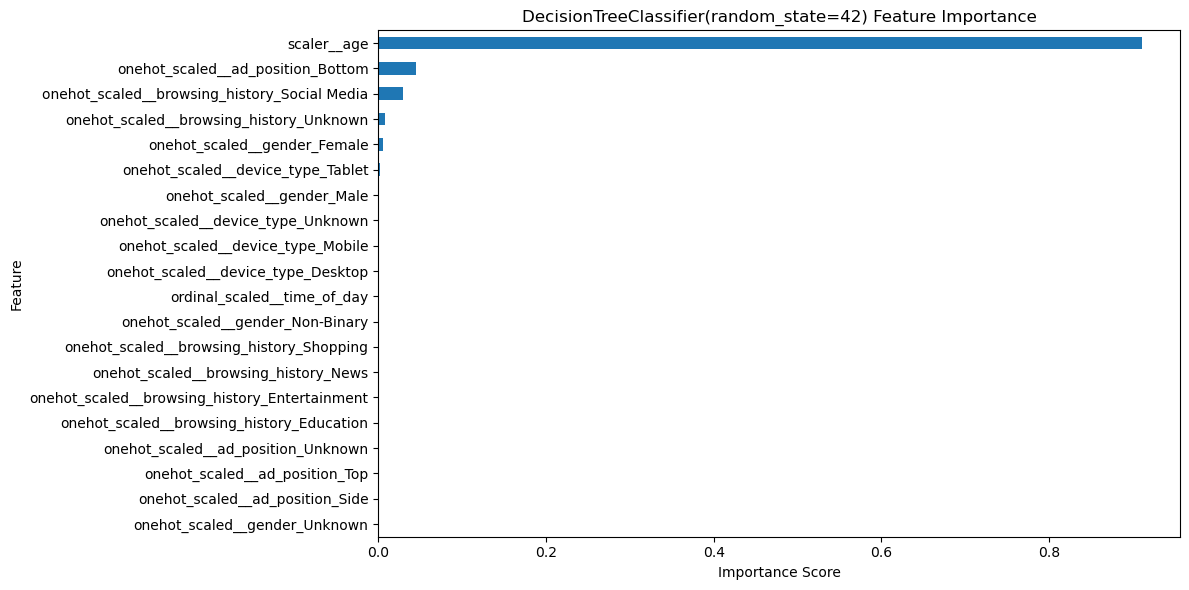

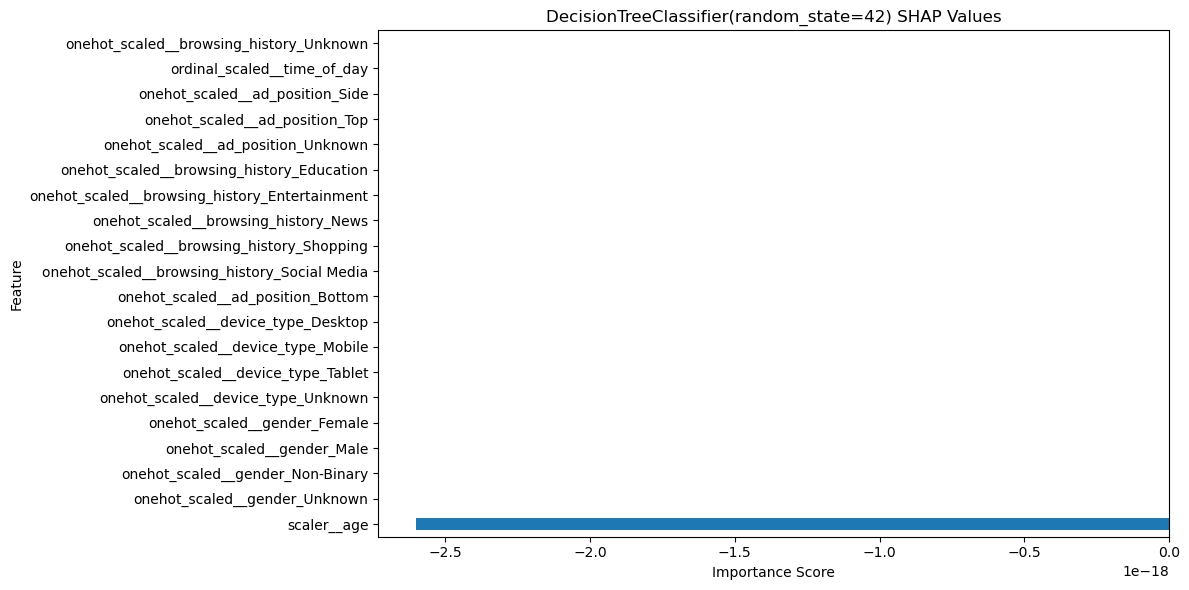

RF


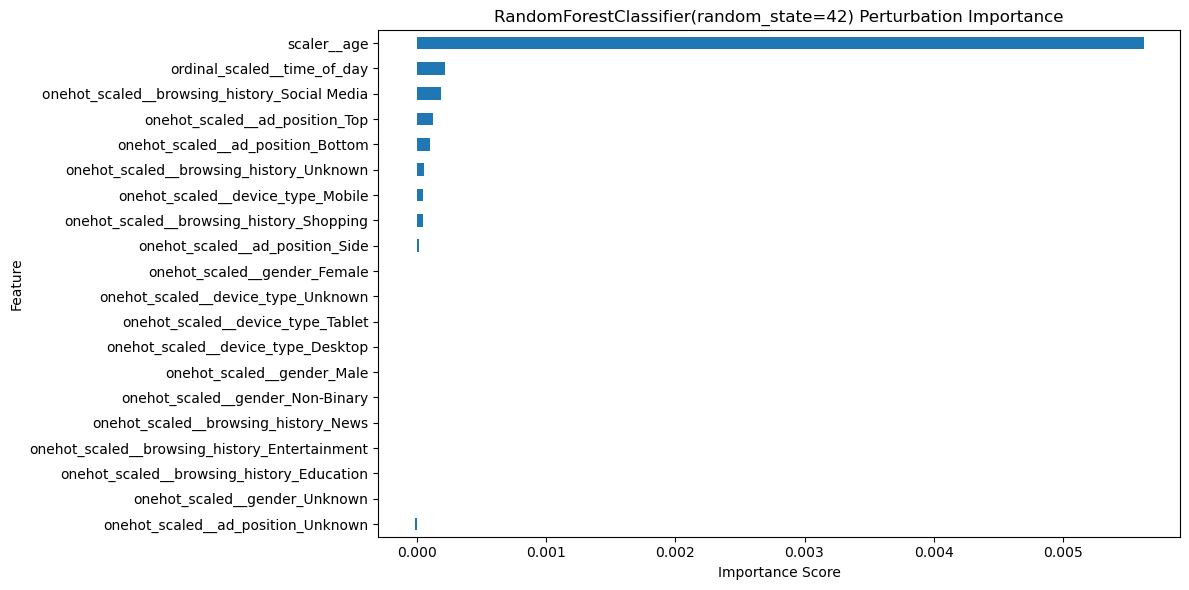

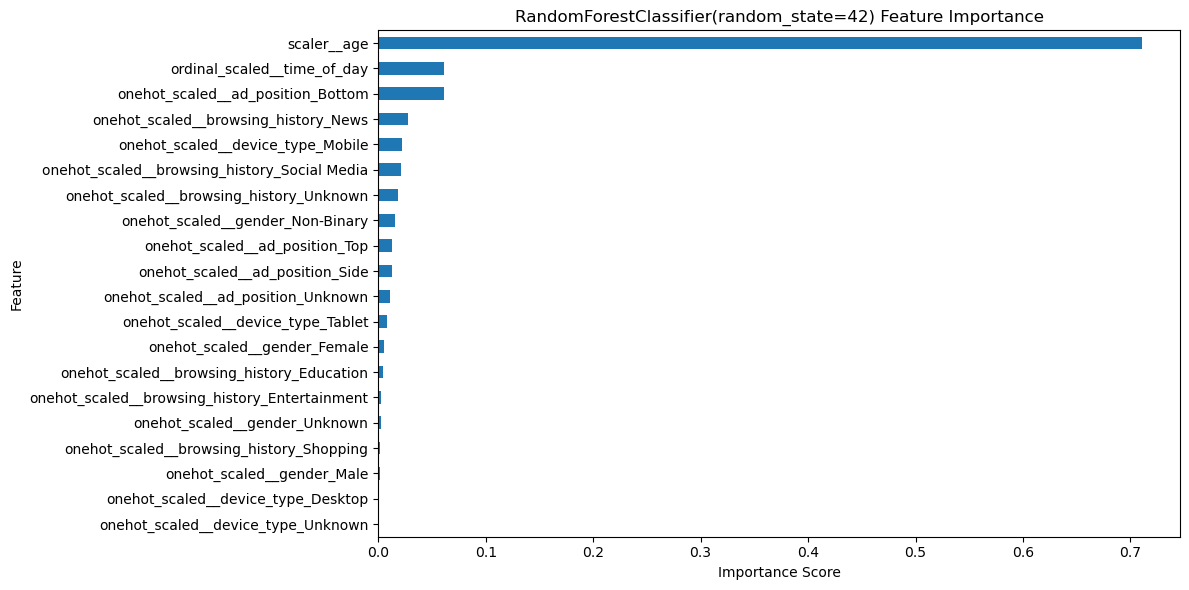

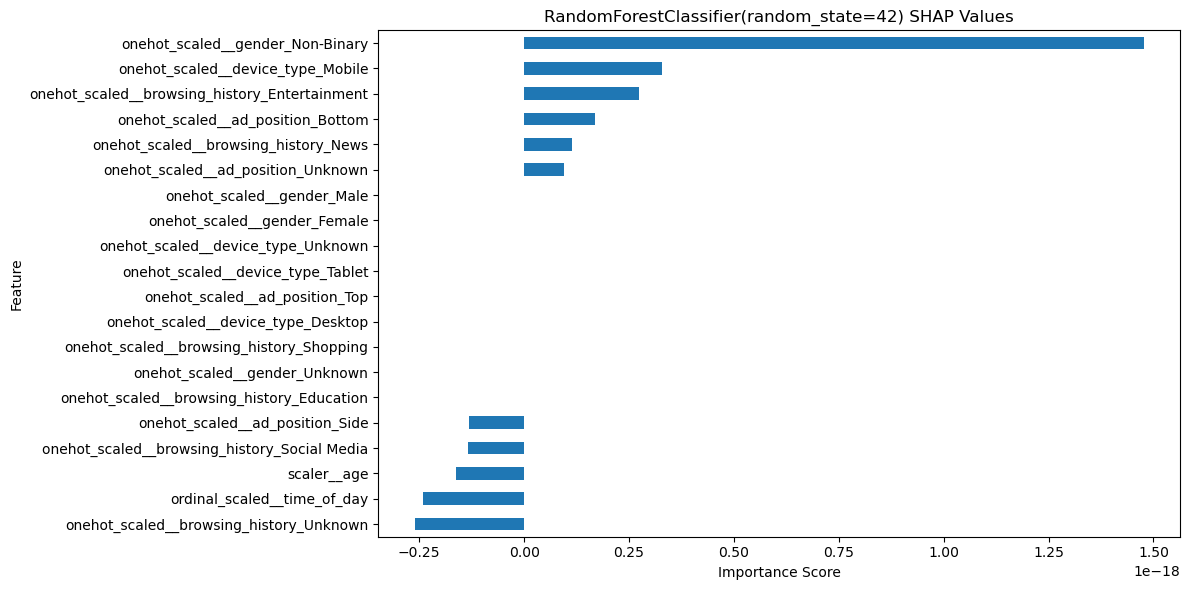

KNN


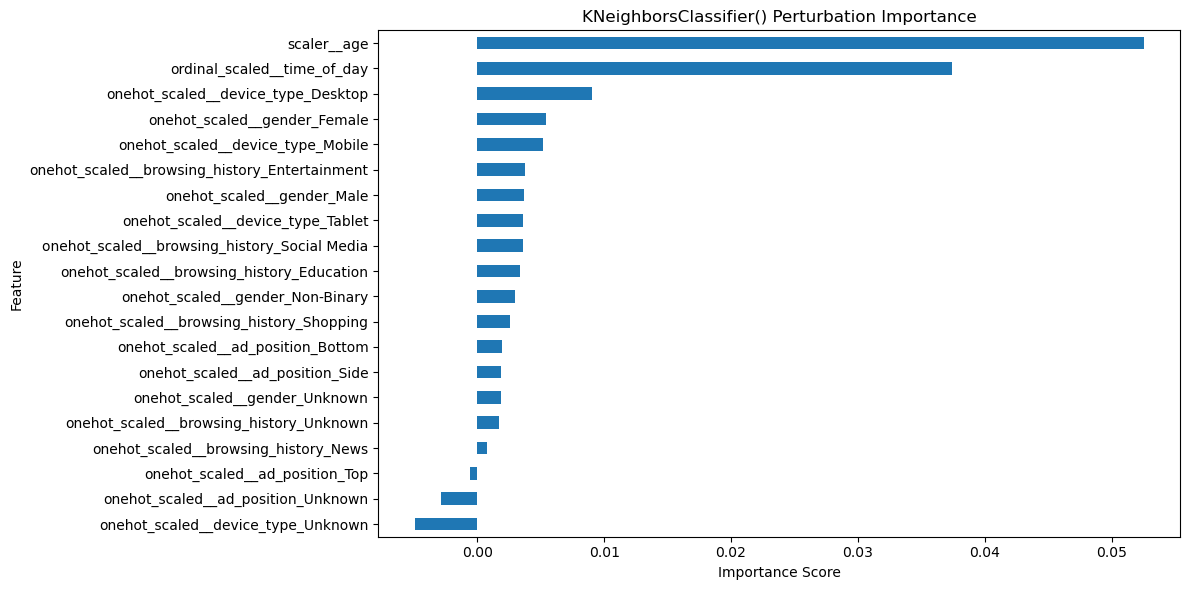

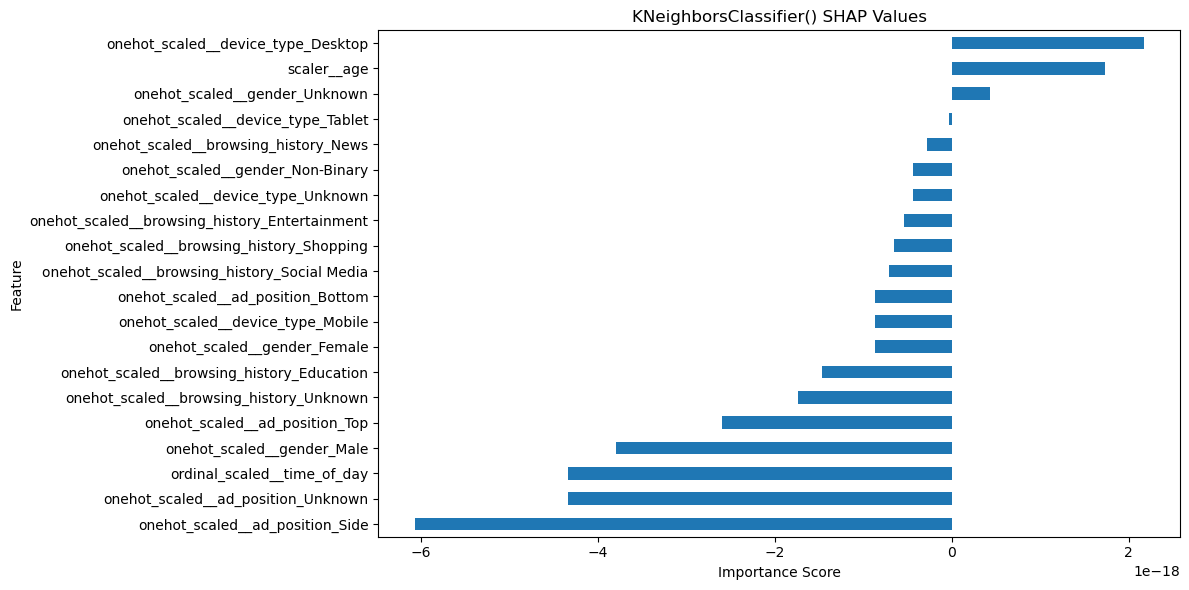

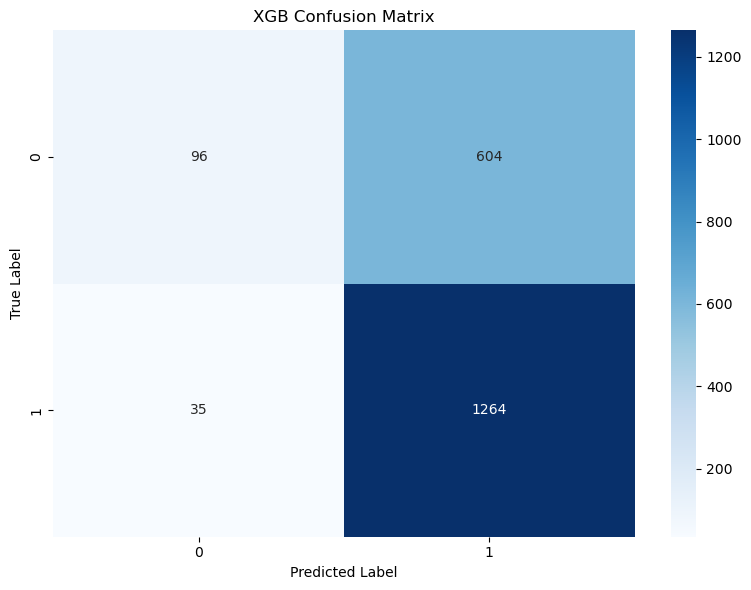

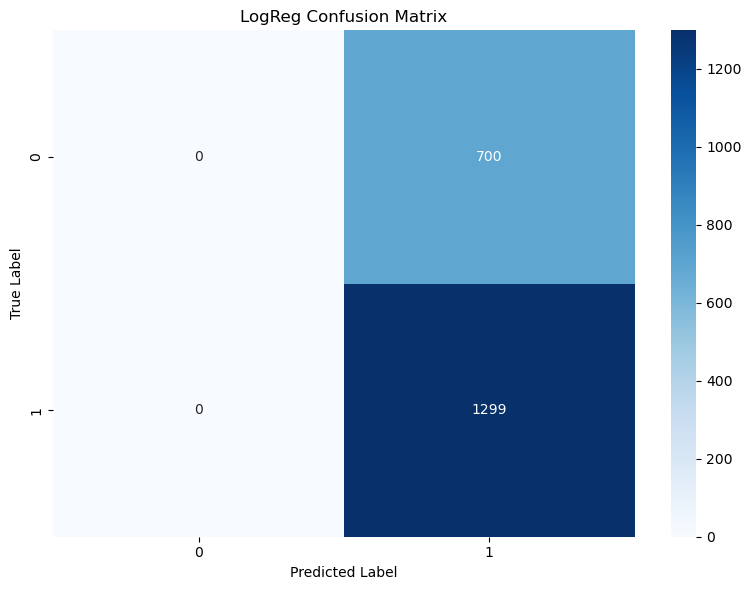

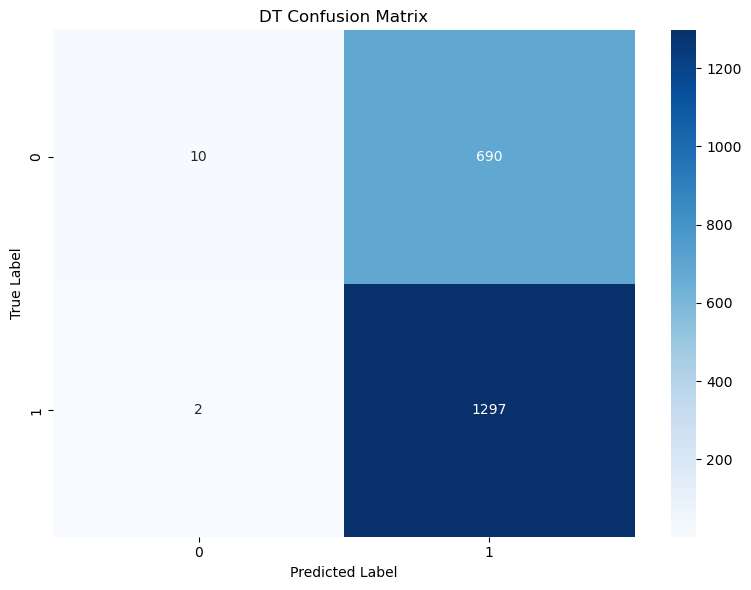

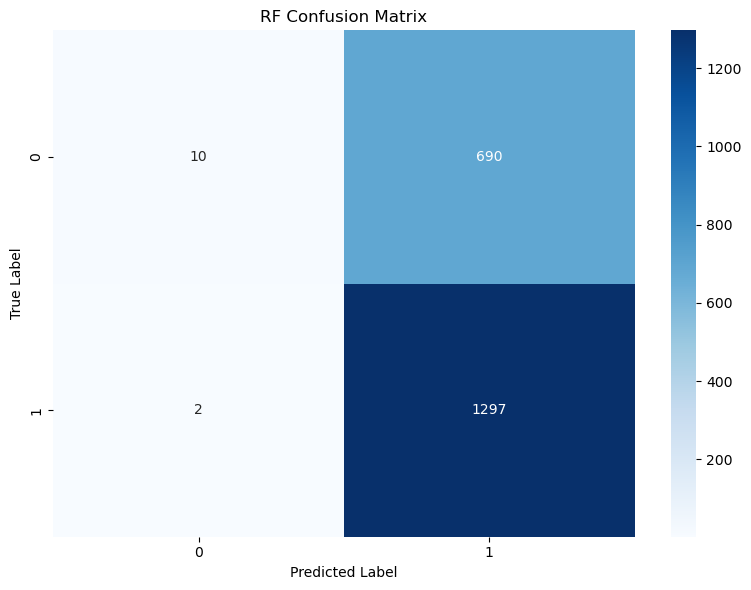

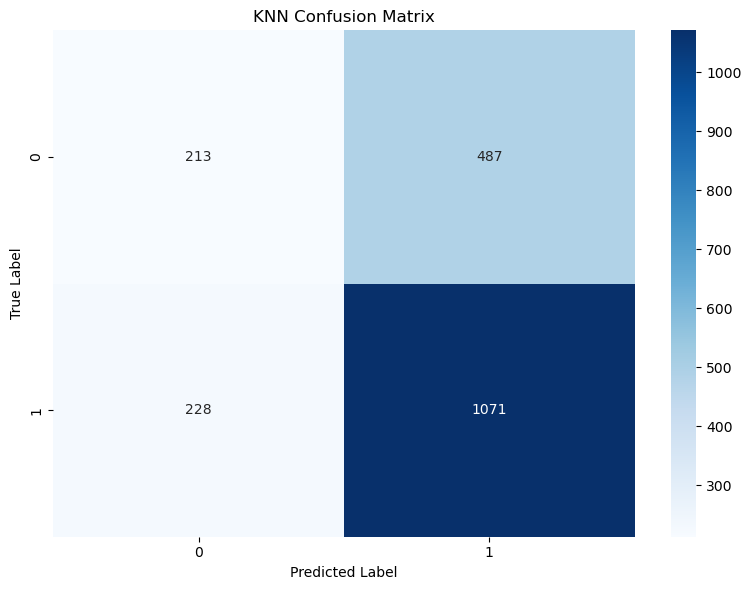

In [946]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def create_model_visualizations(best_performer, importances_dict, conf, X, y, scores, models):
    
    #Plot F1 Scores
    plt.figure(figsize=(12, 6))
    models = list(best_performer.keys())
    means = [best_performer[model]['mean'] for model in models]
    stds = [best_performer[model]['std'] for model in models]
    
    plt.bar(models, means, yerr=stds, capsize=5)
    plt.title('F1 Scores by Model')
    plt.ylabel('F1 Score')
    plt.xticks(rotation=45)
    plt.savefig('F1 Scores by Model.png', dpi=300)
    plt.tight_layout()
    
    # 2. Feature Importance Plots
    for model_name, importance_df in importances_dict.items():
        print(model_name)
        importance_columns = [col for col in importance_df.columns 
                            if any(metric in col for metric in 
                                ['Perturbation', 'SHAP', 'Feature Importance'])]
    
        for column in importance_columns:
            # Create a new figure for each plot
            plt.figure(figsize=(12, 6))
            
            # Sort and plot the data
            importance_df[column].sort_values().plot(kind='barh')

            importance_type = column.split(")")[1].strip() if ")" in column else column
            
            # Set title and labels
            plt.title(f'{column}')
            plt.xlabel('Importance Score')
            plt.tight_layout()

            #uncomment below line to save figures
            plt.savefig(f"{model_name}_{importance_type.replace(' ', '_')}.png", dpi=300)
            
            # Show the plot
            plt.show()

   # 3. Confusion Matrices
    for model_name in models:
        y_true = conf[model_name]['true']
        y_pred = conf[model_name]['pred']
        
        cm = confusion_matrix(y_true, y_pred)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{model_name} Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()

        plt.savefig(f'{model_name} Confusion Matrix.png', dpi=300)
    
    plt.show()



create_model_visualizations(best_performer, importances_dict, conf_matrices, X, y, scores, ["LogReg", "DT", "RF", "XGB", "KNN", "SVC"])



In [949]:
def save_shap_plots(shap_plots_dict, model_keys, indices=[0, 100, 200]):
    """
    Save SHAP plots from dictionary to HTML files
    
    Parameters:
    shap_plots_dict: Dictionary containing SHAP plots
    model_keys: List of model names (e.g. ["KNN", "RF", etc])
    indices: List of indices to save plots 
    """
    
    for model in model_keys:
        for idx in indices:
            shap_force_plot = shap_plots_dict[model][idx]
            
            #save the plot as an html file
            output_path = f"shap_force_plot_{model}_index{idx}.html"
            shap.save_html(output_path, shap_force_plot)
            print(f"Saved SHAP force plot for {model} at index {idx} to {output_path}")

# #uncomment line below to save figures of shap plots
# save_shap_plots(shap_plots_dict, ["KNN", "RF", "XGB", "LogReg", "DT"], [0, 100, 200]) 

Saved SHAP force plot for KNN at index 0 to shap_force_plot_KNN_index0.html
Saved SHAP force plot for KNN at index 100 to shap_force_plot_KNN_index100.html
Saved SHAP force plot for KNN at index 200 to shap_force_plot_KNN_index200.html
Saved SHAP force plot for RF at index 0 to shap_force_plot_RF_index0.html
Saved SHAP force plot for RF at index 100 to shap_force_plot_RF_index100.html
Saved SHAP force plot for RF at index 200 to shap_force_plot_RF_index200.html
Saved SHAP force plot for XGB at index 0 to shap_force_plot_XGB_index0.html
Saved SHAP force plot for XGB at index 100 to shap_force_plot_XGB_index100.html
Saved SHAP force plot for XGB at index 200 to shap_force_plot_XGB_index200.html
Saved SHAP force plot for LogReg at index 0 to shap_force_plot_LogReg_index0.html
Saved SHAP force plot for LogReg at index 100 to shap_force_plot_LogReg_index100.html
Saved SHAP force plot for LogReg at index 200 to shap_force_plot_LogReg_index200.html
Saved SHAP force plot for DT at index 0 to s

In [813]:
shap_plots_dict["KNN"][100]